# Prediction on skin images

> <span style="color:gray">
Created by Martin Hatting Petersen ([s144234](mailto:s144234@student.dtu.dk)).
</span>

In this notebook I will give an opertunity for the reader to run the model on some examples and visualize the results by plotting some images. The user gives a path to a folder where the images are located and the script will then do a prediction on them with a title saying what the prediction is.

## Prediction Code

In [34]:
# imports
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image

%matplotlib inline

import numpy as np
import os
import matplotlib.pyplot as plt

# local imports
from model import ImageModel

Set up the image model

In [36]:
# set up the variables
imageModel = ImageModel()

Define the predict function and plot function

In [37]:
def predict(path,model,model_name):
    images = []
    predictions = []
    classNames = ['Eczema','Psoriasis']
    top_model_input_shape = (8,8,1536)
    model.defineFullModel((299,299,3),top_model_input_shape,model_name)
    for f in os.listdir(path):
        img = load_img(os.path.join(path,f),target_size=(299,299))
        x = img_to_array(img)
        images.append(x)
    images = np.asarray(images,dtype='float32').reshape((-1,299,299,3))
    images = images * 1./255
    p = model.model.predict(images)
    predictions = np.asarray(p).reshape((-1))
    convertPredToImages(images,predictions,classNames)
    
def convertPredToImages(images,predictions,classNames):
    num_images = images.shape[0]
    fig = plt.figure(figsize=(500,100))
    for i,pred in enumerate(predictions):
        p = int(round(pred))
        predClass = 'Pred: '+classNames[p]
        ax = fig.add_subplot(num_images,1,i+1)
        ax.imshow(images[i])
        ax.set_title(predClass)
    plt.show()
        

Run the predict function on the images given in the test folder (you can give any folder containing some images) with the given model and the name of the model (and therefore the name of the trained weights)

Resuming training from checkpoint: checkpoints/weights.best.hdf5


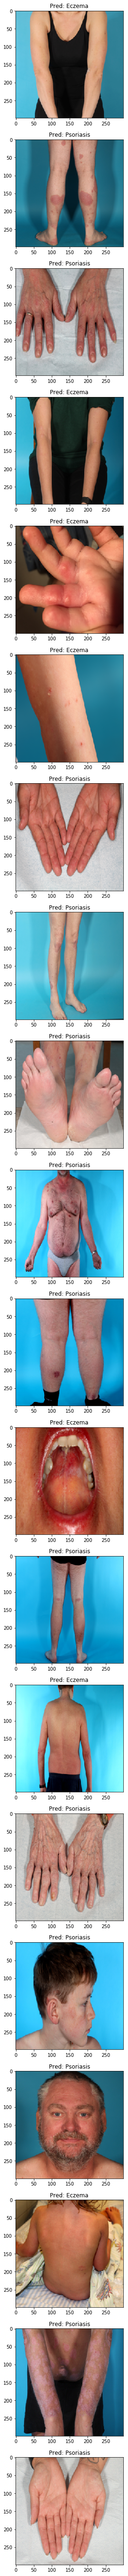

In [39]:
predict(path='test',model=imageModel,model_name='best')

You see the images displayed above with the title corresponding to the prediction of the class